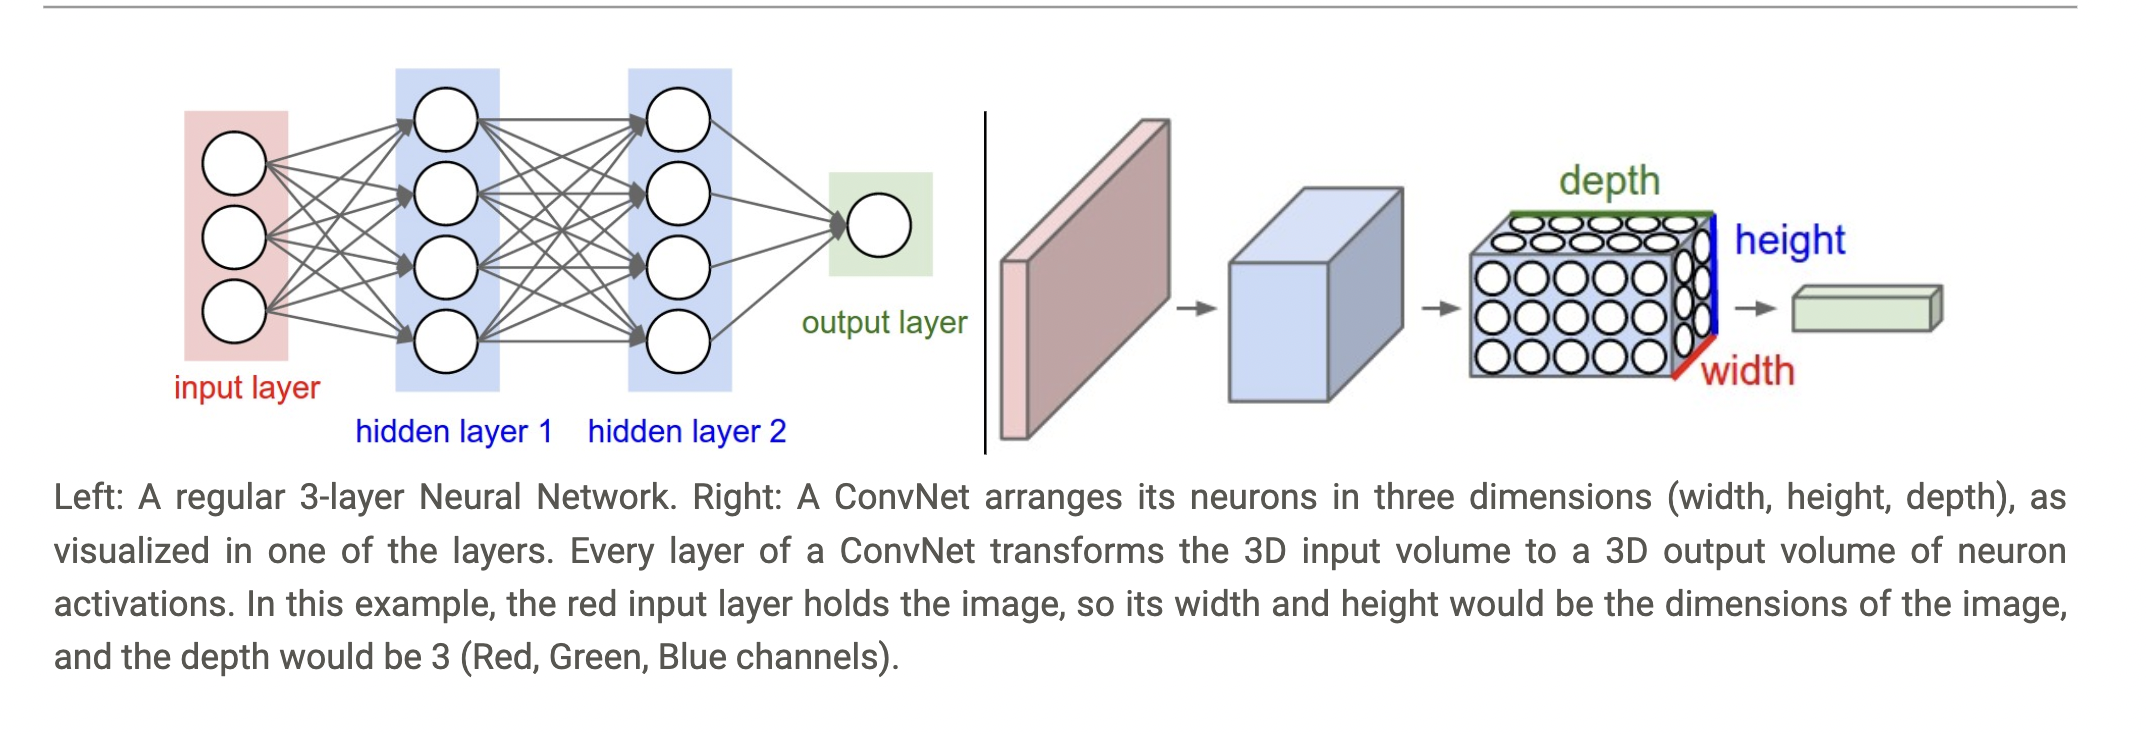

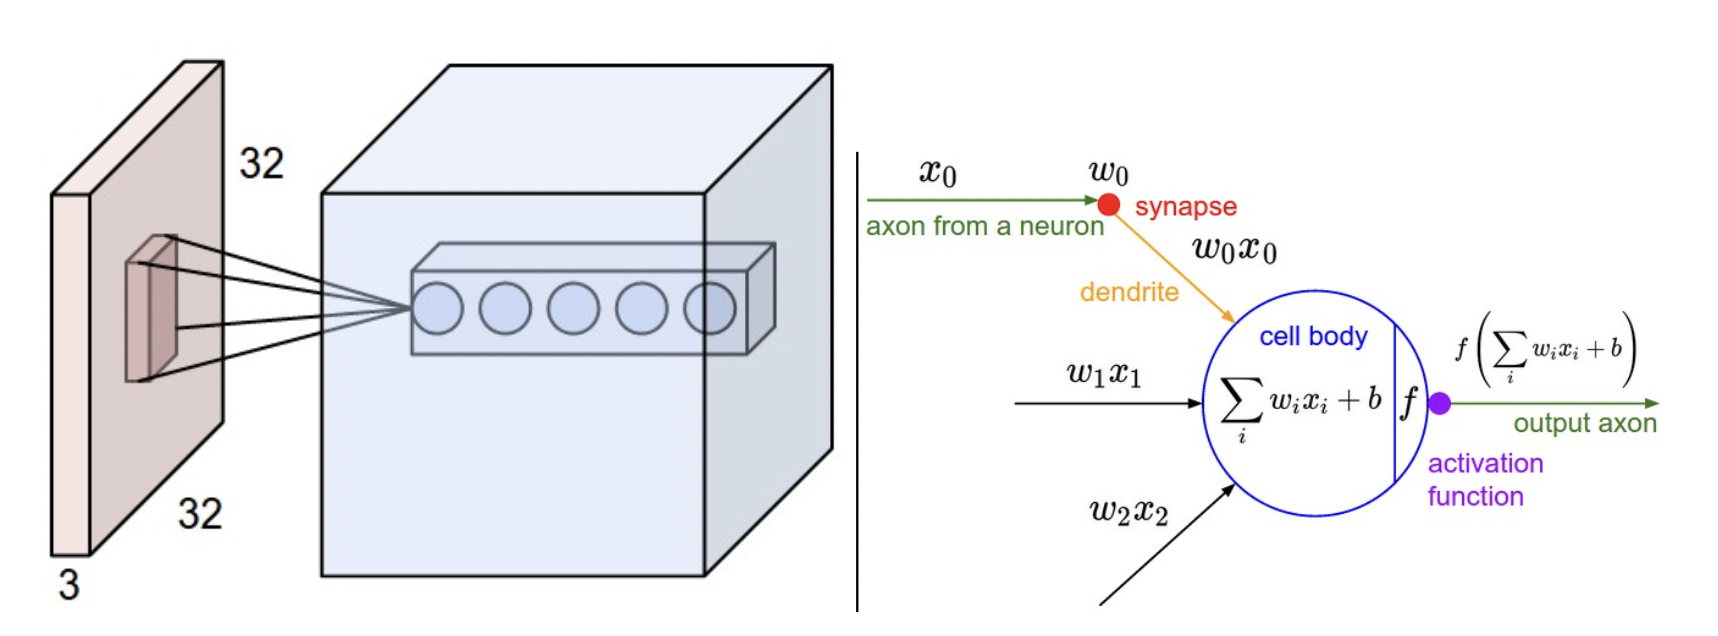

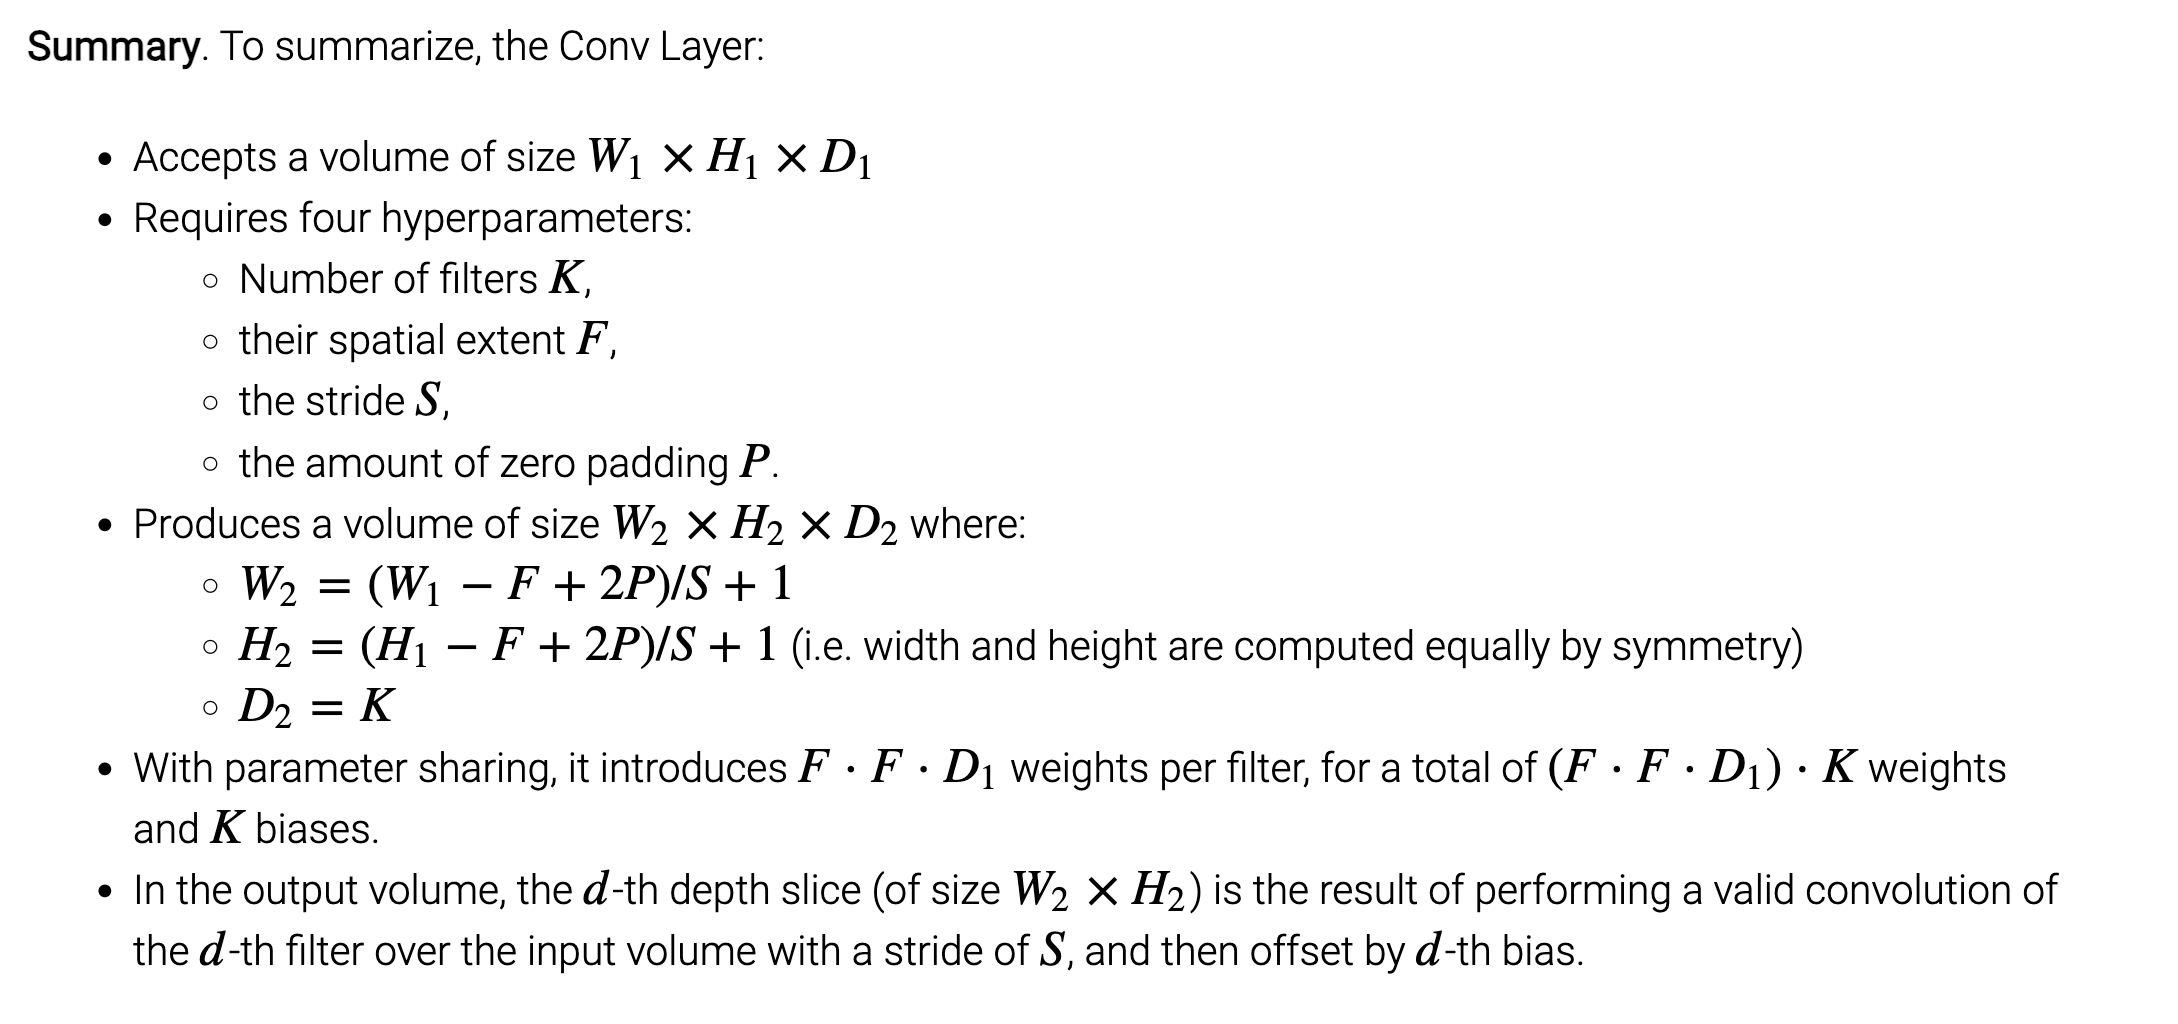

# POOLING LAYER

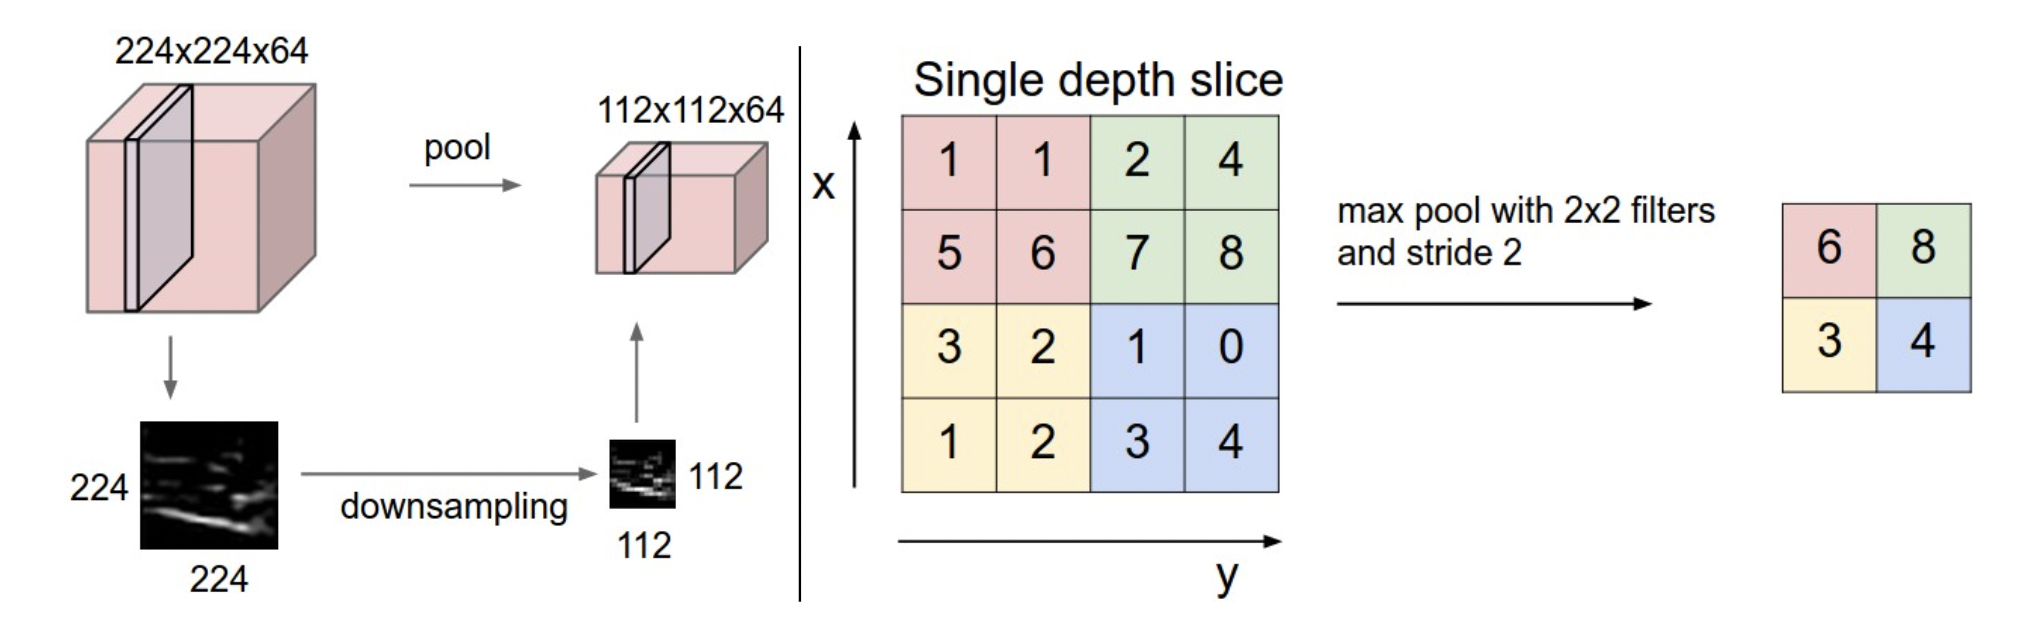

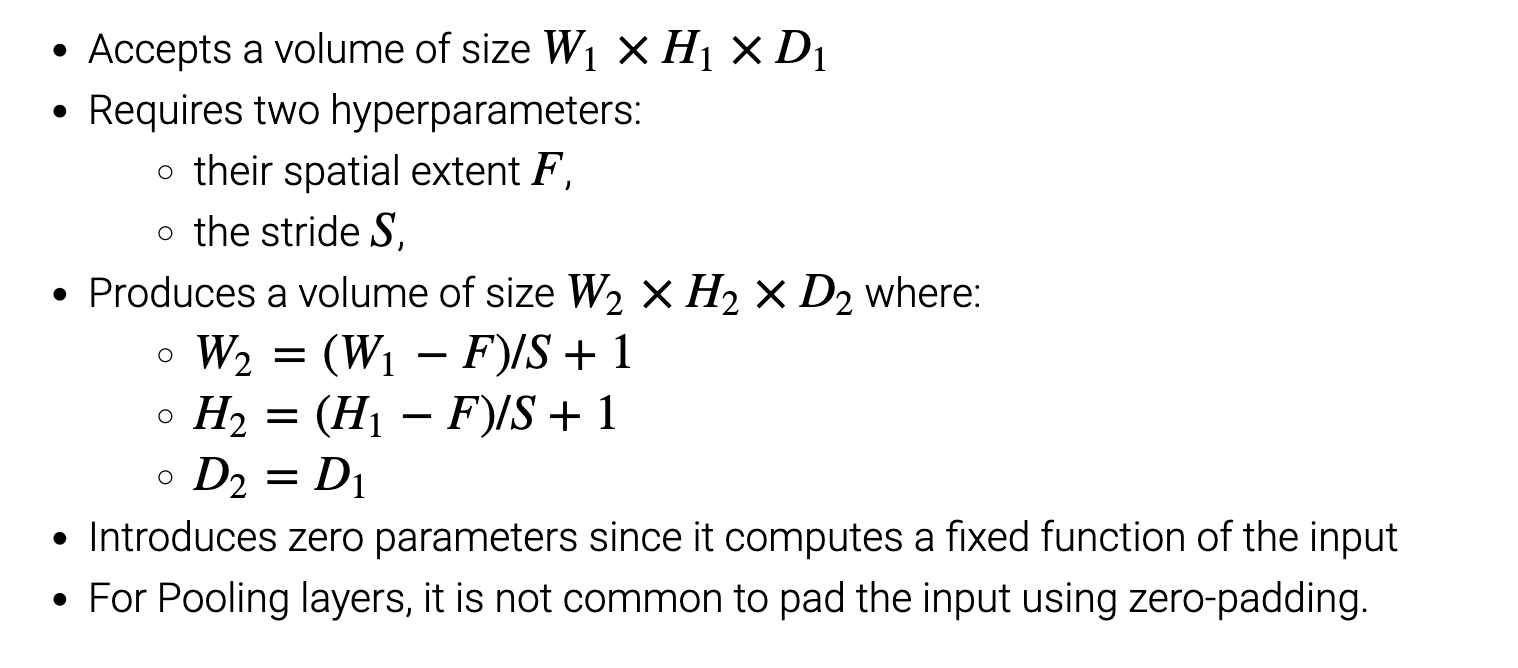

In [ ]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 187MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

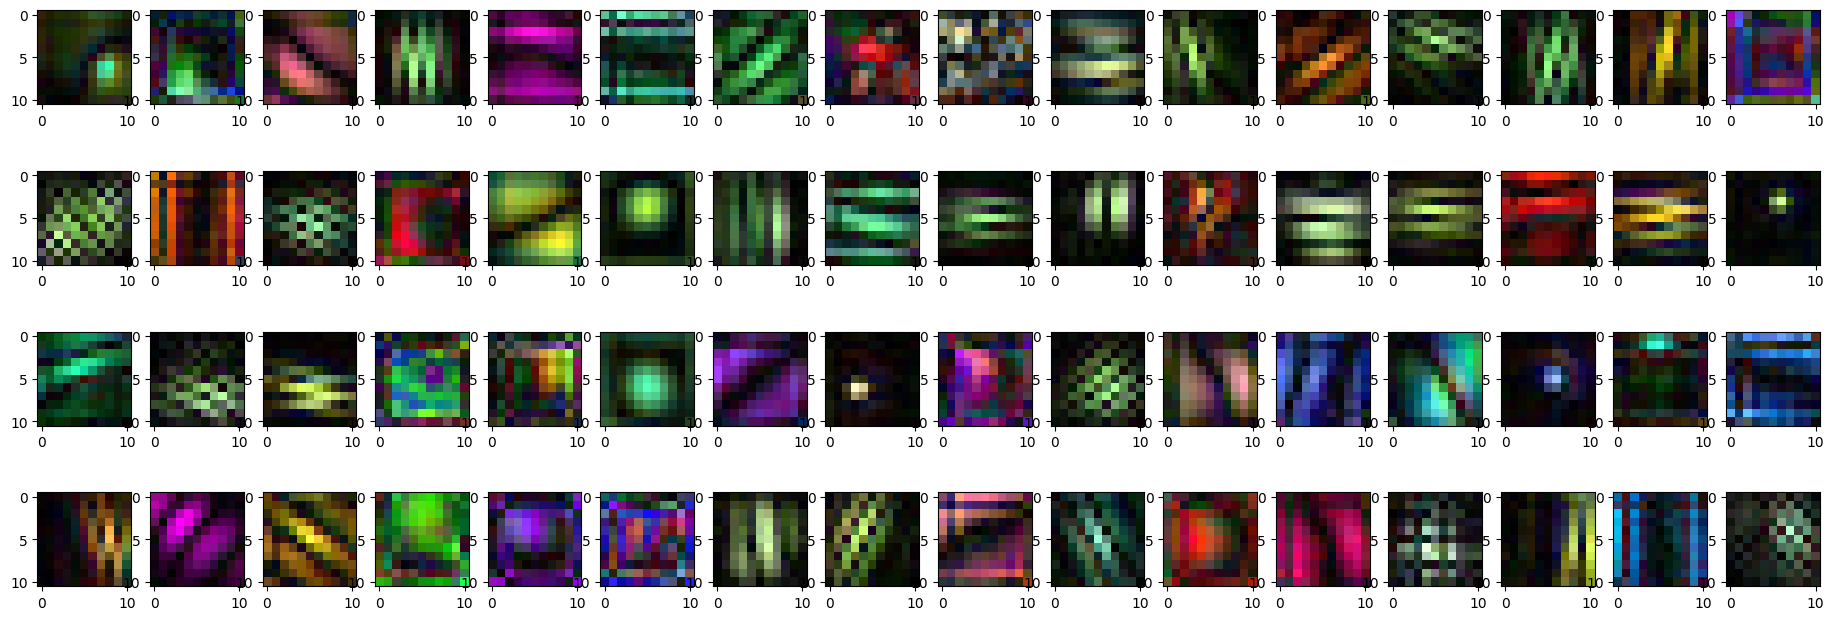

In [ ]:
fig, axs = plt.subplots(4, 16, figsize=(23, 8))

for i in range(4):
  for j in range(16):
    curr_idx = i * 16 + j
    axs[i,j].imshow(np.abs(model.features[0].weight[curr_idx].detach().numpy().T)/np.max(np.abs(model.features[0].weight[curr_idx].detach().numpy().T)));

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
import random

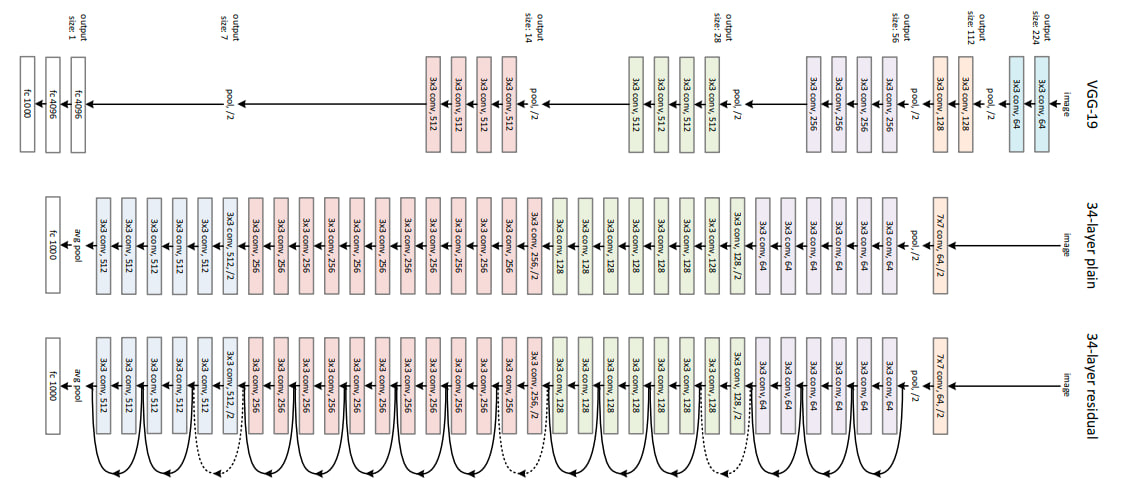

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

In [ ]:
num_classes = 100


In [ ]:
pip install --upgrade torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 681.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

model = torchvision.models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
model.layer1[0].conv1.weight.requires_grad

False

In [ ]:
for param in model.parameters():
  # Freeze your gradients
  param.reqires_grad = False

In [ ]:
# We change the first convolutional lyer in order to deal with our dataset
model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

#We must train this layer, so unfreeze the gradients
for param in model.conv1.parameters():
  param.requires_grad = True

In [ ]:
#Now you need to change so called head of our model. HEad is the linear layer
#that transforms output features into number of classes
num_features = model.fc.in_features
model.fc = nn.Linear(in_features=2048, out_features=100)

#unfreeze the parameters of your head
for param in model.fc.parameters():
  param.requires_grad = True


In [ ]:
model = model.to(device)
model

In [ ]:
model.fc.bias

Parameter containing:
tensor([-0.0118, -0.0183,  0.0107, -0.0070, -0.0085, -0.0212, -0.0165,  0.0097,
         0.0107,  0.0071, -0.0102,  0.0215, -0.0164,  0.0015,  0.0031, -0.0111,
         0.0099, -0.0157, -0.0076, -0.0027,  0.0138,  0.0086,  0.0115, -0.0172,
        -0.0128, -0.0117, -0.0045,  0.0090,  0.0166, -0.0194, -0.0014,  0.0189,
         0.0103,  0.0220, -0.0081, -0.0044,  0.0220, -0.0203, -0.0211, -0.0005,
        -0.0044,  0.0156, -0.0084,  0.0019, -0.0146,  0.0176,  0.0060,  0.0044,
         0.0182, -0.0112, -0.0135,  0.0040, -0.0170, -0.0079, -0.0085,  0.0072,
        -0.0104,  0.0173, -0.0191, -0.0091,  0.0132,  0.0162,  0.0140,  0.0197,
        -0.0022,  0.0055, -0.0017,  0.0083,  0.0198, -0.0084, -0.0075,  0.0069,
         0.0032,  0.0096,  0.0056, -0.0037,  0.0165, -0.0110,  0.0030, -0.0192,
         0.0063,  0.0062, -0.0112,  0.0113,  0.0027, -0.0009, -0.0016, -0.0050,
         0.0083, -0.0089, -0.0052,  0.0197, -0.0130, -0.0134,  0.0162, -0.0005,
         0.0107, -

In [ ]:
# Set dataset path
dataset_path = './data/cifar100'

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])


# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR100(root=dataset_path, train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root=dataset_path, train=False,
                                        download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                          shuffle=False, num_workers=2)



100%|██████████| 169001437/169001437 [00:13<00:00, 12369013.97it/s]


Extracting ./data/cifar100/cifar-100-python.tar.gz to ./data/cifar100
Files already downloaded and verified


In [ ]:
for x, y in testloader:
  break

In [ ]:
x[0].shape

torch.Size([3, 32, 32])

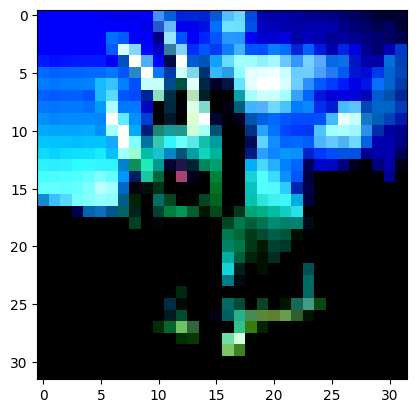

In [ ]:
plt.imshow(x[23].detach().numpy().transpose(1,2,0))

In [ ]:
def train(model, trainloader, criterion, optimizer, device):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    # Switch to train mode
    model.train()

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Update training loss
        train_loss += loss.item() * inputs.size(0)

        # Compute training accuracy
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute average training loss and accuracy
    train_loss = train_loss / len(trainloader.dataset)
    train_accuracy = train_correct / train_total
    print(train_accuracy)

    return model, train_loss, train_accuracy

In [ ]:

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1) #optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [ ]:

for i in range(50):
  train(model, trainloader, criterion, optimizer, 'cuda')

0.28348
0.5364
0.6141
0.65732
0.69052
0.70862
0.72262
0.73676
0.74386
0.75408
0.75824
0.76576
0.76796
0.76848


KeyboardInterrupt: 

In [ ]:
acc= 0
for batch_x, batch_y in testloader:

    batch_x, batch_y = batch_x.to('cuda'), batch_y.to('cuda')
    outputs = model(batch_x)
    break

In [ ]:
_, preds = torch.max(outputs, dim=1)

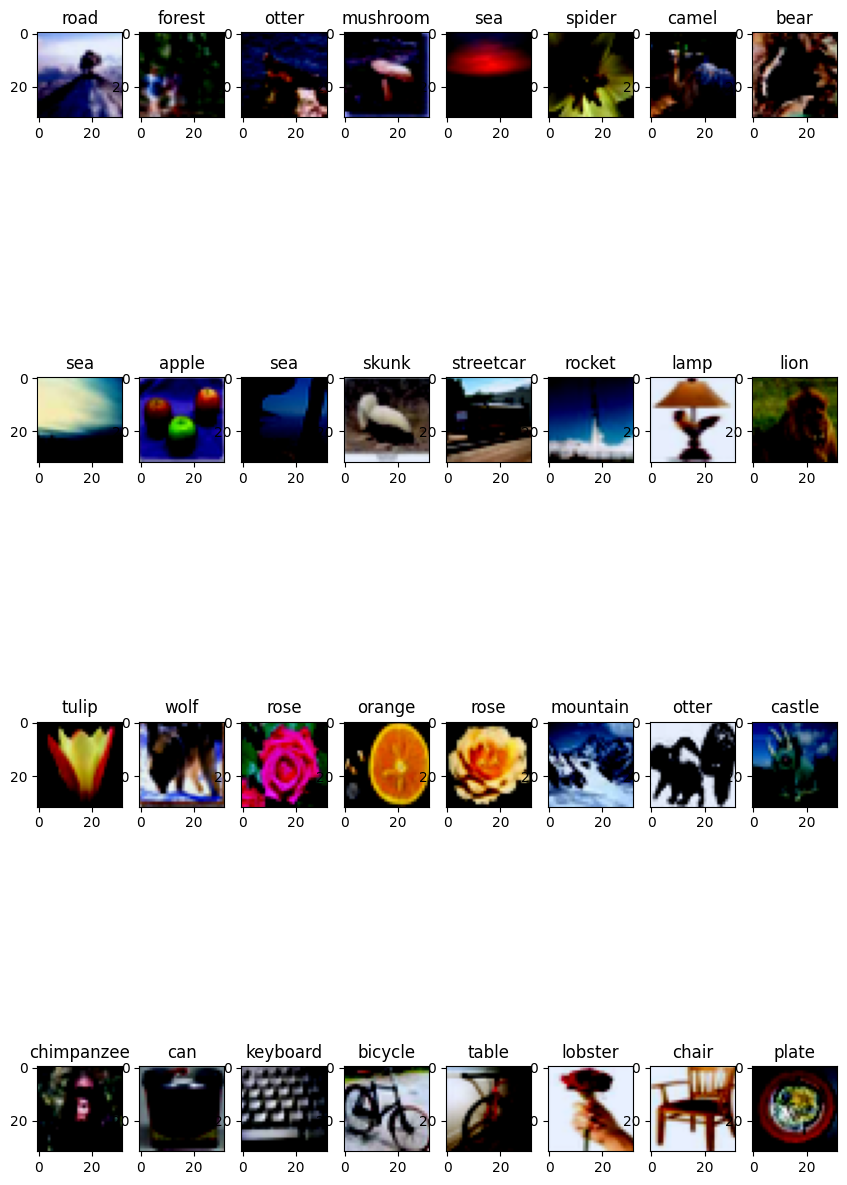

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 8, figsize = (10,16))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(batch_x.detach().cpu().numpy()[i*8 + j].transpose(1,2,0)/np.max(np.abs(batch_x.detach().cpu().numpy()[i*8 + j].transpose(1,2,0))))
        axs[i,j].set_title(np.array(trainset.classes)[preds.cpu().numpy()][i*8 + j])